00 가져온 Data 정보 확인 ========================================================
                  datetime  season  holiday  workingday  weather   temp  \
0      2011-01-01 00:00:00       1        0           0        1   9.84   
1      2011-01-01 01:00:00       1        0           0        1   9.02   
2      2011-01-01 02:00:00       1        0           0        1   9.02   
3      2011-01-01 03:00:00       1        0           0        1   9.84   
4      2011-01-01 04:00:00       1        0           0        1   9.84   
...                    ...     ...      ...         ...      ...    ...   
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity 

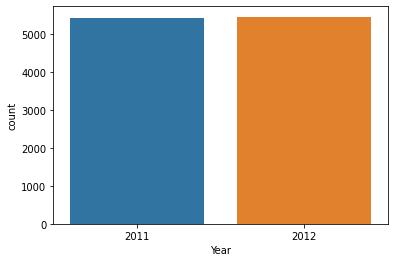

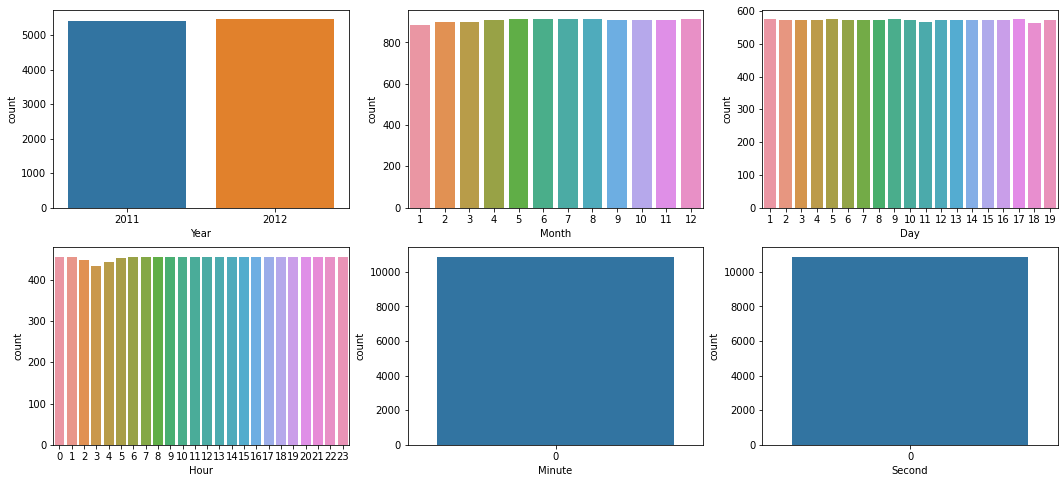

04 train data 및 test data 정보 확인 =============================================
X_train 개수:  8708 , X_test 개수:  2178
[(8708, 9), (8708,)]
[(2178, 9), (2178,)]

05 X_test에 대한 예측값 출력 =====================================================
[201.12337889 270.76419246 329.33919583 ... 105.66982007 258.37212996
 344.98749317]

06 X_test에 대한 손실함수값 계산 및 출력 =========================================
MSE =  13880.786513845482
RMSE =  117.81674971686107

07 x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화 =========


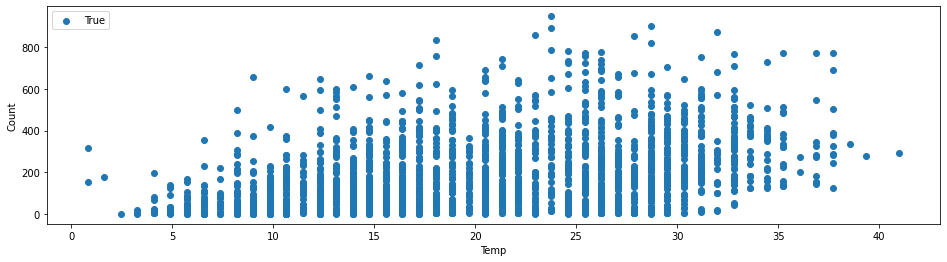

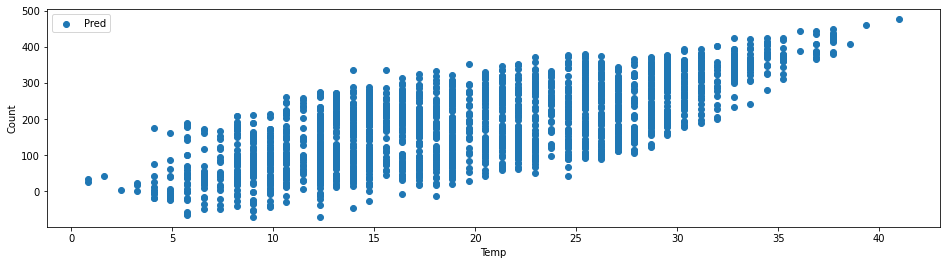

08 x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화 =====


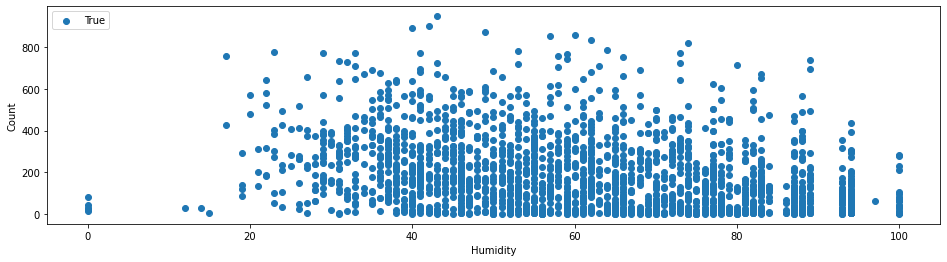

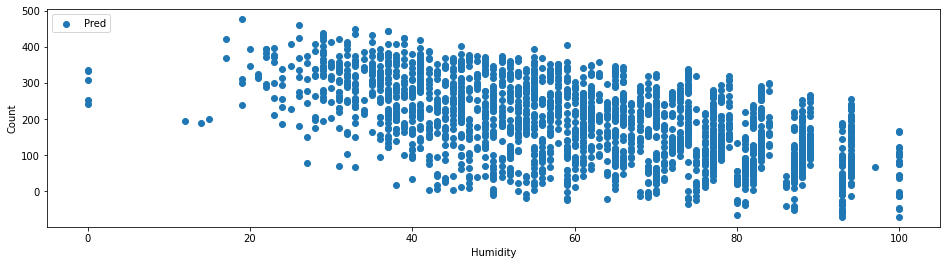

In [6]:
# (1) 데이터 가져오기
import pandas as pd

train = pd.read_csv("~/data/data/bike-sharing-demand/train.csv")
print('00 가져온 Data 정보 확인 ========================================================')
print(train)
print()

# (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기
print('01 datetime 컬럼을 datetime 자료형으로 변환 ======================================')
print(train['datetime'])
train['datetime'] = pd.to_datetime(train['datetime'])
print(train['datetime'])
print()

print('02 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기 ================================')
train.insert(1, "Year", train.datetime.dt.year)
train.insert(2, "Month", train.datetime.dt.month)
train.insert(3, "Day", train.datetime.dt.day)
train.insert(4, "Hour", train.datetime.dt.hour)
train.insert(5, "Minute", train.datetime.dt.minute)
train.insert(6, "Second", train.datetime.dt.second)
print(train)
print()

# (3) year, month, day, hour, minute, second 데이터 개수 시각화하기
import matplotlib.pyplot as plt
import seaborn as sns

print('03 year, month, day, hour, minute, second 데이터 개수 시각화하기 =================')
sns.countplot(x="Year", data=train)
plt.show()

plt.figure(figsize=(18,8))
for i in range(6):
    plt.subplot(2, 3, i+1)  # 2 raw, 3 column
    sns.countplot(x=train.columns[i+1], data=train)
plt.show()

# (4) X, y 컬럼 선택 및 train/test 데이터 분리
from sklearn.model_selection import train_test_split

X = train[['Hour', 'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed']]
y = train['count']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=21)
print('04 train data 및 test data 정보 확인 =============================================')
print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))
print([X_train.shape, y_train.shape])
print([X_test.shape, y_test.shape])
print()

# (5) LinearRegression 모델 학습
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()  # max_iter=2000)  # STOP: TOTAL NO. of ITERATIONS REACHED LIMIT. 발생
linear_model.fit(X_train, y_train)

# (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산
y_pred = linear_model.predict(X_test)
print('05 X_test에 대한 예측값 출력 =====================================================')
print(y_pred)
print()

print('06 X_test에 대한 손실함수값 계산 및 출력 =========================================')
def SE(a, b):
    se = ((a - b) ** 2)
    return se

import numpy as np
total_se = 0
for i in range(2178):
    a = y_test.iloc[0]
    b = y_pred[i]
    total_se = total_se + SE(a, b)
MSE = total_se / 2178
RMSE = np.sqrt(MSE)

print('MSE = ', MSE)
print('RMSE = ', RMSE)
print()

# (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기
X = np.array(X_test)  # dataframe을 array형식으로 변환 (plt.scatter(X[:, 5], y, label="True")에서 에러방지)
y = np.array(y_test)
z = np.array(y_pred)
print('07 x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화 =========')
plt.figure(figsize=(16,4))
plt.scatter(X[:, 5], y, label="True")
plt.xlabel('Temp')
plt.ylabel('Count')
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(16,4))
plt.scatter(X[:, 5], z, label="Pred")
plt.xlabel('Temp')
plt.ylabel('Count')
plt.legend(loc='upper left')
plt.show()

print('08 x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화 =====')
plt.figure(figsize=(16,4))
plt.scatter(X[:, 7], y, label="True")
plt.xlabel('Humidity')
plt.ylabel('Count')
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(16,4))
plt.scatter(X[:, 7], z, label="Pred")
plt.xlabel('Humidity')
plt.ylabel('Count')
plt.legend(loc='upper left')
plt.show()
